<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/2_input_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Epoch 1/100
224/224 - 2s - loss: 0.0723 - 2s/epoch - 11ms/step
Epoch 2/100
224/224 - 0s - loss: 0.0072 - 419ms/epoch - 2ms/step
Epoch 3/100
224/224 - 0s - loss: 0.0027 - 415ms/epoch - 2ms/step
Epoch 4/100
224/224 - 0s - loss: 0.0015 - 434ms/epoch - 2ms/step
Epoch 5/100
224/224 - 0s - loss: 0.0014 - 454ms/epoch - 2ms/step
Epoch 6/100
224/224 - 0s - loss: 0.0013 - 476ms/epoch - 2ms/step
Epoch 7/100
224/224 - 0s - loss: 0.0013 - 423ms/epoch - 2ms/step
Epoch 8/100
224/224 - 1s - loss: 0.0013 - 663ms/epoch - 3ms/step
Epoch 9/100
224/224 - 1s - loss: 0.0013 - 859ms/epoch - 4ms/step
Epoch 10/100
224/224 - 1s - loss: 0.0013 - 741ms/epoch - 3ms/step
Epoch 11/100
224/224 - 1s - loss: 0.0013 - 802ms/epoch - 4ms/step
Epoch 12/100
224/224 - 1s - loss: 0.0013 - 747ms/epoch - 3ms/step
Epoch 13/100
224/224 - 1s - loss: 0.0013 - 806ms/epoch - 4ms/step
Epoch 14/100
224/224 - 1s - loss: 0.0013 - 834ms/epoch - 4ms/step
Epoch 15/100
224/224 - 1s - loss: 0.0012 - 756ms/epoch - 3ms/

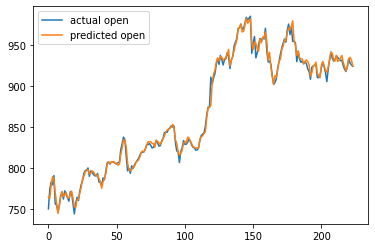

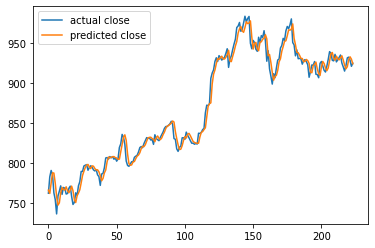

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")



# load data

dataset_train = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")

# memilih kolom open dan close saja
data = data[['Open', 'Close']]

# membuat skala data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(data) * 0.9)
train_data = data[:train_size]
test_data = data[train_size:]

# membuat dataset dengan input dan output
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(data[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# membuat dataset dengan input 2 hari sebelumnya dan output hari berikutnya
look_back = 2
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# membuat model LSTM
model = Sequential()
model.add(LSTM(8, input_shape=(look_back, 2)))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

# melatih model dengan data training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# melakukan prediksi dengan data testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# inverting data kembali ke nilai asli
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# plot hasil prediksi dengan data training
plt.plot(trainY[:,0], label='actual open')
plt.plot(trainPredict[:,0], label='predicted open')
plt.legend()
plt.show()

plt.plot(trainY[:,1], label='actual close')
plt.plot(trainPredict[:,1], label='predicted close')
plt.legend()
plt.show()
